The **Semi-Empirical Mass Formula** is a model of the nuclei's binding energies  (how much energy it takes to break it apart), across the periodic table. It is a function of the atomic number $Z$, and the nucleon number, protons and neutrons, $(A = Z + N)$.

$ B (A, Z) = a_1 A + a_2 A^{2/3} - \frac{a_3 Z^2}{A^{1/3}} - a_4 \frac{(Z - A/2)^2}{A} \pm a_5 A^{-1/2} $

these coefficients are obtained empirically, and each term accounts for an aspect of interaction within the nucleus, namely:


*   $a_1$ the *Volume Term*, strong nuclear force is short-range and each nucleon therefore feels the effect of only the nucleons immediately surrounding it.
*   $a_2$ the *Surface Term*, volume term overestimates the effect of the nuclear force because nucleons at the surface are not surrounded by other nucleons, thus it has to be corrected.
* $a_3$ the *Coulomb Term*, accounts for the Coulomb energy of the charged nucleus (the fact that the protons repel each other!).
* $a_4$ the *Asymmetry Term*, penalizes states that are not N = Z
* $a_5$ the *Pairing Term*, accounts for even N, Z being favored







In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Preparing the constants

# The coefficients, in MeV
a1 = 15.56  
a2 = 17.23 
a3 = 0.697 
a4 = 93.14 
a5 = 12 

# Here we use the integers indicating Z (atomic number) and A (nucleon number)
Z = np.linspace(5, 100, 95, dtype= int) # I started from 5 since the graph behaves funky from 0 to 5 so I chose to eliminate it
A = np.linspace(5, 100, 95, dtype= int)

To find the most stable nuclei, that is the nuclei with the greatest binding energy, we optimize $B$, with respect to the atomic number $Z$

\begin{align*}
\frac{dB}{dZ} &= \frac{d}{dZ} \left[ a_1 A + a_2 A^{2/3} - \frac{a_3 Z^2}{A^{1/3}} - a_4 \frac{(Z - A/2)^2}{A} \pm a_5 A^{-1/2}  \right] \\
&= -\frac{2 a_3 Z}{A^{1/3}} - \frac{2 a_4 (Z - A/2)}{A} = 0 \\
Z_{opt} &= \frac{a_4 A}{2 a_3 A^{2/3} + 2 a_4} \\
\end{align*}

If we use the Second Derivative Test, we can find if this point is a minima or maxima.
\begin{align*}
\frac{d^2 B}{dZ^2} &= \frac{d}{dZ} \frac{dB}{dZ}  \\
&= \frac{d}{dZ} \left[ -\frac{2 a_3 Z}{A^{1/3}} - \frac{2 a_4 (Z - A/2)}{A}  \right] \\
&=  -\frac{2 a_3}{A^{1/3}} - \frac{2 a_4 }{A}\\
\end{align*}
Since $A>0$, and the coefficients are also positive numbers, $\frac{d^2 B}{dZ^2}< 0 $, which means that the graph concaves down. Therefore $Z_{opt}$ is a local maximum,


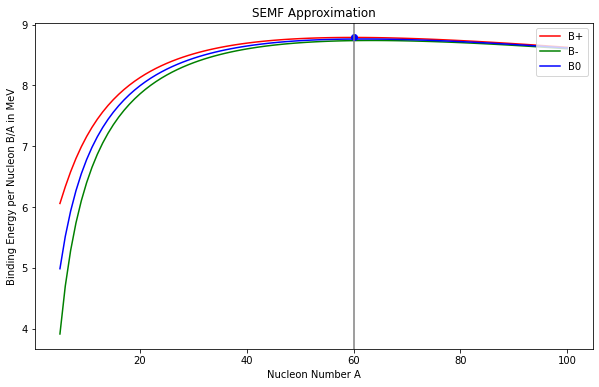

In [2]:

# The optimized B, dB/dZ
Z_opt = (a4*A) / (2*a3*(np.power(A, 2/3)) + 2*a4)

# The Semi-Empirical Mass Formula, split into three cases, with the positive and negative pairing term, also without it
# np.power since we're dealing with powers of an array, alsp allows us to take fractional exponents
# We then substitute Z_opt to B to obtain the most stable nucleus
B_oo = a1*A - a2*(np.power(A, 2/3)) - a3*( np.power(Z_opt, 2) ) / ( np.power(A, 1/3) ) - a4*( np.power(Z_opt - A/2, 2) ) / A + a5 / (np.power(A, 1/2))
B_ee = a1*A - a2*(np.power(A, 2/3)) - a3*(np.power(Z_opt, 2))/(np.power(A, 1/3)) - a4*(np.power(Z_opt - A/2, 2)) / A - a5/(np.power(A, 1/2))
B_other = a1*A - a2*(np.power(A, 2/3)) - a3*(np.power(Z_opt, 2))/(np.power(A, 1/3)) - a4*(np.power(Z_opt - A/2, 2)) / A

# setting the axes at the centre
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)



# plot the function
plt.plot(A, B_oo/A, 'r')
plt.plot(A, B_ee/A, 'g')
plt.plot(A, B_other/A, 'b')
plt.legend(["B+", "B-", 'B0'], loc ="upper right")
plt.xlabel('Nucleon Number A')
plt.ylabel('Binding Energy per Nucleon B/A in MeV')
plt.title('SEMF Approximation')

# This part here finds the Maximum in the graph and plots it there
y = B_oo/A
x = Z

n_max = y.argmax()
plt.plot(x[n_max],y[n_max],'bo') # the dot points at the maximum
plt.axvline(x=60, color="grey" ) # the vertical line is actually an eyeball aim

# show the plot
plt.show()

From this graph, we can tell that the most stable nuclei has the Nucleon number $A = 60$. However, in reality, it is Nickel-62 that has the greatest binding energy per nucleon.

In [3]:
# Finding the Maximum B/A
max1 = np.amax(B_oo/A)
max2 = np.amax(B_ee/A)
max3 = np.amax(B_other/A)

print('With odd-odd parity, B/A is: ', max1)
print('With even-even parity, B/A is: ', max2)
print('With even-odd parity, B/A is: ', max3)

print("Thus the odd-odd parity has the greatest Binding Energy per nucleon")

With odd-odd parity, B/A is:  8.788839688082197
With even-even parity, B/A is:  8.739202692485884
With even-odd parity, B/A is:  8.763469363962466
Thus the odd-odd parity has the greatest Binding Energy per nucleon
